C:\ProgramData\Anaconda3\Scripts\win

    py38环境启动失败报错解决：ImportError: DLL load failed while importing win32api: 找不到指定的模块
    首先，找到文件pywin32_postinstall.py，路径在[Path to Anaconda3]\Scripts\
    然后执行：python [Path to Anaconda3]\Scripts\pywin32_postinstall.py -install 即可

### 图片预处理和数据结构的理解
   

In [1]:
import tensorflow as tf

In [3]:
import numpy as np
from PIL import Image

In [7]:
#图片在计算机茨城县的状态/方式
img = Image.open("../data/Duanwu Festival.jpg")
to_array = np.array(img)
print(to_array.shape)

(1080, 1920, 3)


### to_array.shape 表示数组行列大小（高h=行，宽w=列）

### reshape转换前后的维度乘积要一致

In [14]:
to_array1 = np.array(img).reshape(1080*1920*3)
print(to_array1.shape)
print(to_array1)

(6220800,)
[250 251 245 ...  40  39  35]


In [13]:

1080*1920*3

6220800

### 用全连接层（Fully Connected）搭建网络
    dropout处理过度学习

In [1]:
import keras #keras整框架导入
from keras.datasets import mnist #数据集
import matplotlib.pyplot as plt #matplotlib 用于打印输出图或图表
from keras.layers import Dense, Dropout #神经网络层导入
from keras.models import Sequential #网络建设模式Sequential序列模型和Model函数模型
import numpy as np 

In [16]:
#加载官方mnist数据集
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#（训练样本，训练样本的标签）（测试样本，测试样本的标签）

#### 数据集可视化

0


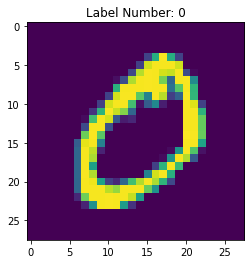

In [17]:
index = 1
print(y_train[index])
plt.imshow(x_train[index])
plt.title('Label Number: '+str(y_train[index]))
plt.show()

In [18]:
#第一部数据的预先处理之归一化 即将0-255之间的数据 压缩到0-1之间
x_train = x_train / 255.0
x_test = x_test / 255.0
#根据网络要求改变数组输入的shape
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

In [19]:
#标签转one-hot-encoding
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)


In [20]:
#搭建网络结构 - 全连接层
model = Sequential() #实例化
#像模型中添加层Dense层为全连接层
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25)) #dropout是一个层，防止网络过度学习，比如学习了100个就保留一部分
model.add(Dense(units=10,activation='softmax'))

In [21]:
# 模型编译-设置模型的损失loss、优化器optimizier
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### 训练

In [27]:
model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64, #60000/63=938
    epochs = 10,     #训练轮数
    
    validation_split=0.1 #拿出10%训练样本作为验证样本，随着训练就开始验证
)

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0130 - val_accuracy: 0.9960
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0144 - val_accuracy: 0.9950
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0209 - val_accuracy: 0.9933
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0162 - accuracy: 0.9943 - val_loss: 0.0211 - val_accuracy: 0.9923
Epoch 5/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.0246 - val_accuracy: 0.9922
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0145 - accuracy: 0.9949 - val_loss: 0.0336 - val_accuracy: 0.9883
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0387 - val_accuracy: 0.9875
Epoch 

### 使用测试集测试效果


In [28]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1007 - accuracy: 0.9807
0.10068202018737793 0.9807000160217285


In [29]:
model.save('../output/mnistTrain.h5')

## 预测

In [30]:
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import numpy as np

In [37]:
### 加载DIY样本并进行预处理
img_open = Image.open('../data/3.jpg')

In [46]:
img_to_array = np.array(img_open).reshape(1,784,)/255.0
print(img_to_array.shape)

(1, 784)


In [40]:
model = load_model('../output/mnistTrain.h5')

In [42]:
prediction = model.predict(img_to_array)
prediction

array([[2.1866647e-07, 6.0129300e-05, 8.2924409e-04, 9.5674980e-01,
        9.9961499e-06, 3.2953180e-06, 1.3889957e-09, 8.4316153e-03,
        3.8246217e-03, 3.0091064e-02]], dtype=float32)

In [43]:
Final_Pred = [result.argmax() for result in prediction][0]

In [44]:
print(Final_Pred)

3


In [49]:
counter = 0
for i in prediction[0]:
    percent = "%.2f%%"%(i*100)
    print(str(counter)+"概率",percent)
    counter += 1

0概率 0.00%
1概率 0.01%
2概率 0.08%
3概率 95.67%
4概率 0.00%
5概率 0.00%
6概率 0.00%
7概率 0.84%
8概率 0.38%
9概率 3.01%
